In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as py

In [2]:
from matplotlib import font_manager, rc            # 그래프의 한글 폰트 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# # 결측치 처리 - 'None' 문자열로 변경
# patientInfo = patientInfo.fillna('None')

# # 케이스 카테고리화
# church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
# nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
# gym=['gym facility in Sejong','gym facility in Cheonan']
# etc=['Changnyeong Coin Karaoke','Seongdong-gu APT', 'etc']
# work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']
# shincheonji = ['Shincheonji Church', 'None']

# category_name = ['Church related','Nurshing related', 'Gym related', 'ETC', 'Workplace related', 'Shincheonji Church']
# for i,category in enumerate([church, nurshing, gym, etc, work, shincheonji]):
#     # enumerate = { 0 : church, 1 : nurshing, 2 : gym, 3 : etc, 4 : work, 5 : shincheonji }
#     # category = [ church, nurshing, gym, etc, work, shincheonji ]
#     patientInfo.infection_case = patientInfo.infection_case.replace(category, category_name[i])
#     # infection_case의 열에 있는 값을 ['Church related','Nurshing related', 'Gym related', 'ETC', 'Workplace related', 'Shincheonji Church'] 으로 바꾸겠다.

# patientInfo.iloc[24:26, 7:10] # 24번 데이터는 Eunpyeong St. Mary's Hospital -> Nurshing related 변화, 25번 데이터는 etc -> ETC 변화

In [4]:
# 지역별로 분류해서 그래프 만들기
# sub_title=["수도권 지역", "영남 지역", "호남 지역"]
# fig = make_subplots(rows=1, cols=3,
#                     specs=[[{'type':'domain'},{'type':'domain'}]],
#                    subplot_titles=([f'>' for prov in sub_title]))
# # 재 작성 필요

# 전국 확진자 수 증가 양상

In [5]:
timeProvince = pd.read_csv('./corodata/TimeProvince.csv')
timeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2256,2020-05-31,0,Jeollabuk-do,21,19,0
2257,2020-05-31,0,Jeollanam-do,19,17,0
2258,2020-05-31,0,Gyeongsangbuk-do,1379,1295,54
2259,2020-05-31,0,Gyeongsangnam-do,123,121,0


In [6]:
timeProvince['province'].unique() # province의 모든 값

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [7]:
# province와 date 기준으로 정렬
sort = timeProvince.sort_values(by=['province', 'date'] ,ascending=[False, True])
sort

,date,time,province,confirmed,released,deceased
6,2020-01-20,16,Ulsan,0,0,0
23,2020-01-21,16,Ulsan,0,0,0
40,2020-01-22,16,Ulsan,0,0,0
57,2020-01-23,16,Ulsan,0,0,0
74,2020-01-24,16,Ulsan,0,0,0
...,...,...,...,...,...,...
2177,2020-05-27,0,Busan,144,135,3
2194,2020-05-28,0,Busan,145,136,3
2211,2020-05-29,0,Busan,145,136,3
2228,2020-05-30,0,Busan,146,138,3


In [8]:
# 피벗테이블 생성 / 행 = 날짜, 열 = 지역, 값 = 확진자 수 / 지역별 확진자 수 증가 파악 가능

confirmed = pd.pivot_table(timeProvince, index='date',columns='province', values='confirmed') # 행 = 날짜, 열 = 지역, 값 = 확진자 수 / 지역별 확진자 수 증가 파악 가능
confirmed.head(10)
# confirmed.iloc[:, 15:16] # 서울 데이터

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0
2020-01-28,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0


In [9]:
# 지역별로 분류해 날짜순으로 확진자 수가 얼마나 증가하는 지 확인할 수 있다.

wc = ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
confirmed['wc'] = confirmed[wc].sum(axis=1)

confirmed.iloc[:,17]

date
2020-01-20        1
2020-01-21        1
2020-01-22        1
2020-01-23        1
2020-01-24        2
              ...  
2020-05-27    10743
2020-05-28    10815
2020-05-29    10873
2020-05-30    10907
2020-05-31    10934
Name: wc, Length: 133, dtype: int64

# 전국 누적 확진자 수 증가 양상

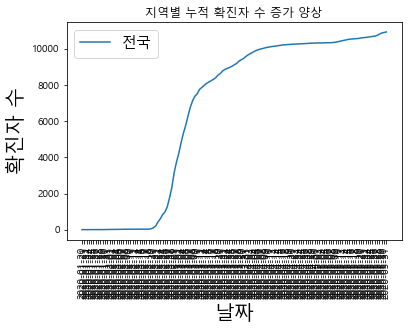

In [10]:
# 지역별 누적 확진자 수 증가 양상

plt.title("전국 누적 확진자 수 증가 양상")

plt.plot(confirmed.index, confirmed['wc'], label='전국')

plt.legend(loc=2)
plt.xlabel('date', fontsize=20)
plt.ylabel('num_patient', fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc=2, fontsize=15)
plt.xlabel('날짜')
plt.ylabel('확진자 수')
py.rcParams["figure.figsize"] = 20,4
plt.show()

# 전국 신규 확진자 수 증가 양상


In [11]:
# 지역별 신규 확진자 수 리스트 생성

wc_new_list = list()
for i in range(len(confirmed['wc'])):
    if i == 0:
        wc_new_list.append(confirmed['wc'][0])
    else:
        j = confirmed['wc'][i] - confirmed['wc'][i-1]
        wc_new_list.append(j)


In [12]:
# 신규 확진자 수 colunms 추가

confirmed['wc_new'] = wc_new_list

confirmed.iloc[:, -1]

date
2020-01-20     1
2020-01-21     0
2020-01-22     0
2020-01-23     0
2020-01-24     1
              ..
2020-05-27    39
2020-05-28    72
2020-05-29    58
2020-05-30    34
2020-05-31    27
Name: wc_new, Length: 133, dtype: int64

In [16]:
len(confirmed.index)

133

In [18]:
confirmed

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan,wc,wc_new
date,,,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,144,60,145,6878,45,56,30,774,1378,123,158,14,21,18,47,802,50,10743,39
2020-05-28,145,60,146,6880,45,56,30,795,1379,123,180,14,21,18,47,826,50,10815,72
2020-05-29,145,60,146,6880,45,56,30,815,1379,123,198,14,21,18,47,846,50,10873,58


In [19]:
confirmed.columns.name=None
confirmed = confirmed.reset_index()

In [20]:

for i in range(len(confirmed.index)):
    if confirmed['date'][i][8:10] == '21' or confirmed['date'][i][8:10] == '22' or confirmed['date'][i][8:10] == '23' or confirmed['date'][i][8:10] == '24' or confirmed['date'][i][8:10] == '25' or confirmed['date'][i][8:10] == '26' or confirmed['date'][i][8:10] == '27' or confirmed['date'][i][8:10] == '28' or confirmed['date'][i][8:10] == '30' or confirmed['date'][i][8:10] == '31' or confirmed['date'][i][8:10] == '02' or confirmed['date'][i][8:10] == '03' or confirmed['date'][i][8:10] == '04' or confirmed['date'][i][8:10] == '05' or confirmed['date'][i][8:10] == '06' or confirmed['date'][i][8:10] == '07' or confirmed['date'][i][8:10] == '08' or confirmed['date'][i][8:10] == '09' or confirmed['date'][i][8:10] == '10' or confirmed['date'][i][8:10] == '11' or confirmed['date'][i][8:10] == '12' or confirmed['date'][i][8:10] == '13' or confirmed['date'][i][8:10] == '14' or confirmed['date'][i][8:10] == '15' or confirmed['date'][i][8:10] == '16' or confirmed['date'][i][8:10] == '17' or confirmed['date'][i][8:10] == '18' or confirmed['date'][i][8:10] == '19' or confirmed['date'][i][8:10] == '20':
        confirmed['date'] = confirmed['date'].replace([confirmed['date'][i]], '')

confirmed['date'] = confirmed['date'].replace(['2020-01-29', '2020-03-01', '2020-04-01', '2020-05-01'], '')
confirmed['date'] = confirmed['date'].replace(['2020-02-01'], 'Feb 1')
confirmed['date'] = confirmed['date'].replace(['2020-02-29'], 'Feb 29')
confirmed['date'] = confirmed['date'].replace(['2020-03-29'], 'Mar 29')
confirmed['date'] = confirmed['date'].replace(['2020-04-29'], 'Apr 29')
confirmed['date'] = confirmed['date'].replace(['2020-05-29'], 'May 29')
confirmed.head(5)

,date,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan,wc,wc_new
0,,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1


# 전국 확진자 및 누적 확진자 수 증가 양상

In [ ]:
ax = confirmed.plot(kind='bar', x='date', y='sudo_new',  color='Red',  fontsize=20, label='신규 확진자')
ax2 = confirmed.plot(kind='line', x='date', y='sudo', color='DarkBlue',figsize=(30,5), secondary_y=True, fontsize=20, ax=ax, label='누적 확진자')

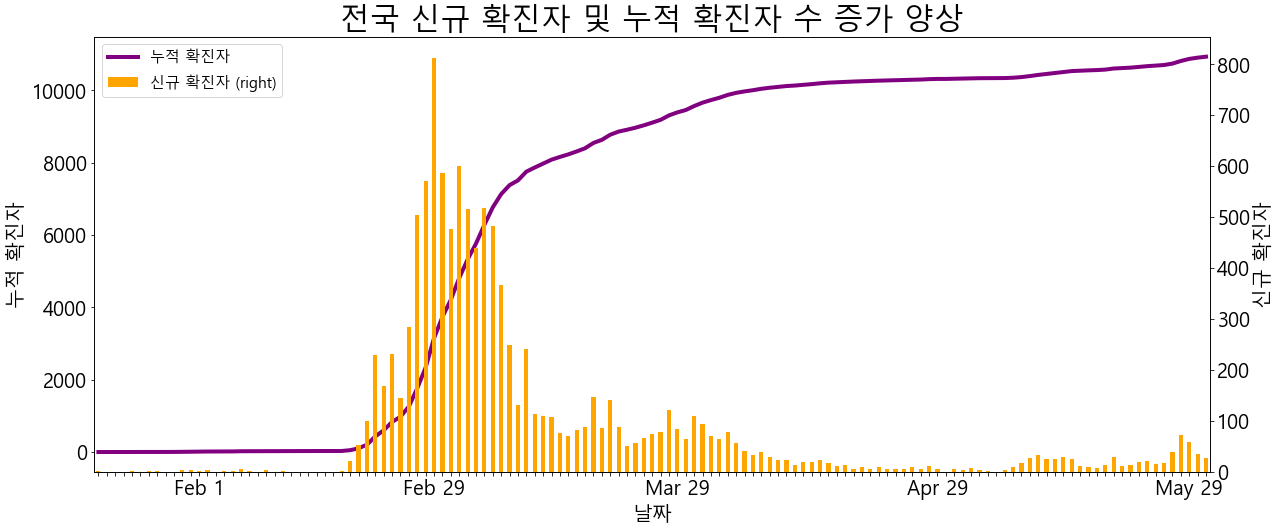

In [41]:
# 수도권 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', x='date', y='wc', color='purple', fontsize=20, label='누적 확진자',rot=0, linewidth=4)
ax2 = confirmed.plot(kind='bar', x='date', y='wc_new', secondary_y=True, color='orange', ax=ax, fontsize=20, label= '신규 확진자',rot=0)
# plt.legend(loc=2)
# ax.legend(['누적 확진자'], fontsize=15, loc=2) 
# ax2.legend(['신규 확진자'], fontsize=15, loc=2) 
plt.rc('legend', fontsize=15)
plt.title('전국 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=30)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('날짜', fontsize=20)
py.rcParams["figure.figsize"] = 20,8
plt.show()


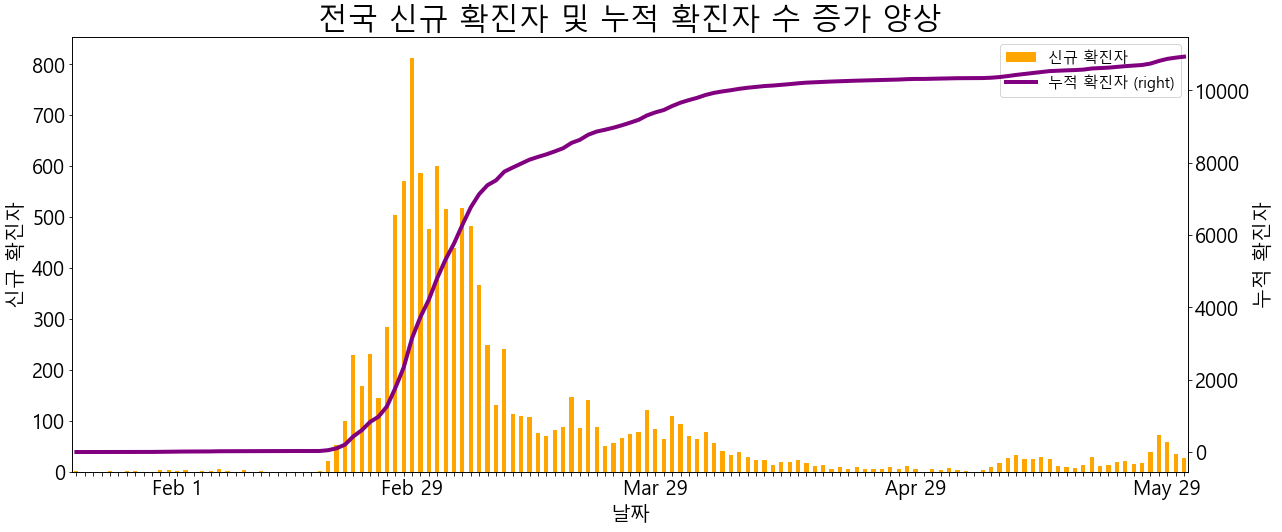

In [43]:
# 수도권 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='bar', x='date', y='wc_new', color='orange', fontsize=20, label= '신규 확진자',rot=0)
ax2 = confirmed.plot(kind='line', x='date', y='wc', secondary_y=True, ax=ax, color='purple', fontsize=20, label='누적 확진자',rot=0, linewidth=4)
# plt.legend(loc=2)
# ax.legend(['누적 확진자'], fontsize=15, loc=2) 
# ax2.legend(['신규 확진자'], fontsize=15, loc=2) 
plt.rc('legend', fontsize=15)
plt.title('전국 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=30)
ax.set_ylabel('신규 확진자', fontsize=20)
ax2.set_ylabel('누적 확진자', fontsize=20)
ax.set_xlabel('날짜', fontsize=20)
py.rcParams["figure.figsize"] = 20,8
plt.show()


In [14]:
confirmed

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan,wc,wc_new
date,,,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,144,60,145,6878,45,56,30,774,1378,123,158,14,21,18,47,802,50,10743,39
2020-05-28,145,60,146,6880,45,56,30,795,1379,123,180,14,21,18,47,826,50,10815,72
2020-05-29,145,60,146,6880,45,56,30,815,1379,123,198,14,21,18,47,846,50,10873,58
